# cisTopic visualisation: enrichment of B cell states in topics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import iglob
import matplotlib as mpl
import math
import scipy
import matplotlib.pyplot as plt

In [2]:
topic_number = 18

In [3]:
# 3 B cell states - Naive, US-mem (USM) and S-mem (SM)
celltype_number = 3

In [4]:
# table with normalised AUC values for each cell and each topic

cisTopic_18 = pd.read_csv('./cisTopic_cell_enrichment.csv',sep='\t')


In [5]:
cisTopic_18.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,celltype,TREATMENT
Immunodeficiency7827658,0.036440,0.158369,0.032220,0.015038,0.044126,0.021067,0.055731,0.168165,0.093712,0.023478,0.059951,0.041866,0.058896,0.049100,0.021067,0.012627,0.084820,0.023327,SM B-cells,CONTROL
Immunodeficiency7827659,0.047065,0.118838,0.040874,0.035259,0.046777,0.033171,0.066142,0.118694,0.085651,0.023812,0.057503,0.039506,0.065206,0.051528,0.014454,0.038282,0.078668,0.038570,USM B-cells,CONTROL
Immunodeficiency7827660,0.031559,0.120284,0.036105,0.037647,0.044385,0.033264,0.044304,0.130187,0.072066,0.023685,0.048768,0.095201,0.055100,0.048038,0.015324,0.042680,0.082700,0.038703,SM B-cells,CONTROL
Immunodeficiency7827661,0.025938,0.149434,0.041552,0.020765,0.038636,0.019825,0.041740,0.136642,0.089238,0.053967,0.020577,0.011266,0.067981,0.051051,0.037601,0.042116,0.099960,0.051710,USM B-cells,CONTROL
Immunodeficiency7827662,0.036432,0.120838,0.043674,0.032328,0.040536,0.026213,0.056870,0.133873,0.082699,0.011247,0.056065,0.053812,0.069181,0.052203,0.014546,0.035788,0.085676,0.048019,SM B-cells,CONTROL


In [6]:
# CONTROL enrichment tables

cisTopic_18_control_naive = cisTopic_18[(cisTopic_18['celltype'] == 'Naive B-cells')
                                       & (cisTopic_18['TREATMENT'] == 'CONTROL')]
cisTopic_18_control_naive = cisTopic_18_control_naive[cisTopic_18_control_naive.columns[0:18]].astype(float)


cisTopic_18_control_usm = cisTopic_18[(cisTopic_18['celltype'] == 'USM B-cells')
                                       & (cisTopic_18['TREATMENT'] == 'CONTROL')]
cisTopic_18_control_usm = cisTopic_18_control_usm[cisTopic_18_control_usm.columns[0:18]].astype(float)


cisTopic_18_control_sm = cisTopic_18[(cisTopic_18['celltype'] == 'SM B-cells')
                                       & (cisTopic_18['TREATMENT'] == 'CONTROL')]
cisTopic_18_control_sm = cisTopic_18_control_sm[cisTopic_18_control_sm.columns[0:18]].astype(float)


# CVID enrichment tables

cisTopic_18_cvid_naive = cisTopic_18[(cisTopic_18['celltype'] == 'Naive B-cells')
                                       & (cisTopic_18['TREATMENT'] == 'CVID')]
cisTopic_18_cvid_naive = cisTopic_18_cvid_naive[cisTopic_18_cvid_naive.columns[0:18]].astype(float)


cisTopic_18_cvid_usm = cisTopic_18[(cisTopic_18['celltype'] == 'USM B-cells')
                                       & (cisTopic_18['TREATMENT'] == 'CVID')]
cisTopic_18_cvid_usm = cisTopic_18_cvid_usm[cisTopic_18_cvid_usm.columns[0:18]].astype(float)


cisTopic_18_cvid_sm = cisTopic_18[(cisTopic_18['celltype'] == 'SM B-cells')
                                       & (cisTopic_18['TREATMENT'] == 'CVID')]
cisTopic_18_cvid_sm = cisTopic_18_cvid_sm[cisTopic_18_cvid_sm.columns[0:18]].astype(float)


In [7]:
# means table | pseudobulks
cistopic_means_18 = pd.DataFrame(data = {'Naive CONTROL': [np.mean(cisTopic_18_control_naive[cisTopic_18_control_naive.columns[i]]) for i in range(len(cisTopic_18_control_naive.columns))],
                                         'Naive CVID': [np.mean(cisTopic_18_cvid_naive[cisTopic_18_cvid_naive.columns[i]]) for i in range(len(cisTopic_18_cvid_naive.columns))],
                                         'USM CONTROL': [np.mean(cisTopic_18_control_usm[cisTopic_18_control_usm.columns[i]]) for i in range(len(cisTopic_18_control_usm.columns))],
                                         'USM CVID': [np.mean(cisTopic_18_cvid_usm[cisTopic_18_cvid_usm.columns[i]]) for i in range(len(cisTopic_18_cvid_usm.columns))],
                                         'SM CONTROL': [np.mean(cisTopic_18_control_sm[cisTopic_18_control_sm.columns[i]]) for i in range(len(cisTopic_18_control_sm.columns))],
                                         'SM CVID': [np.mean(cisTopic_18_cvid_sm[cisTopic_18_cvid_sm.columns[i]]) for i in range(len(cisTopic_18_cvid_sm.columns))]
                                        })

In [8]:
cistopic_means_18.index = [i for i in range(1,19)]

In [9]:
# p-values

pvals_Naive = {}
pvals_USM = {}
pvals_SM = {}

for i in range(cisTopic_18_control_naive.shape[1]):
    #print(cisTopic_18_control_naive.columns[i])
    curr_pval_Naive = scipy.stats.mannwhitneyu(list(cisTopic_18_control_naive[cisTopic_18_control_naive.columns[i]]),
                                         list(cisTopic_18_cvid_naive[cisTopic_18_cvid_naive.columns[i]]))[1]
    pvals_Naive[cisTopic_18_control_naive.columns[i]] = curr_pval_Naive
    
    curr_pval_USM = scipy.stats.mannwhitneyu(list(cisTopic_18_control_usm[cisTopic_18_control_usm.columns[i]]),
                                         list(cisTopic_18_cvid_usm[cisTopic_18_cvid_usm.columns[i]]))[1]
    pvals_USM[cisTopic_18_control_naive.columns[i]] = curr_pval_USM
    
    curr_pval_SM = scipy.stats.mannwhitneyu(list(cisTopic_18_control_sm[cisTopic_18_control_sm.columns[i]]),
                                         list(cisTopic_18_cvid_sm[cisTopic_18_cvid_sm.columns[i]]))[1]
    pvals_SM[cisTopic_18_control_naive.columns[i]] = curr_pval_SM

    
    
    
    

In [10]:
# from p-values to -log10(p-value)
neglog_pvals_Naive = {}
neglog_pvals_USM = {}
neglog_pvals_SM = {}

for i in range(topic_number):
    #print(pvals_Naive[list(pvals_Naive.keys())[i]])
    neglog_pvals_Naive['Topic'+str(i+1)] = -1*math.log(pvals_Naive[list(pvals_Naive.keys())[i]],10)
    neglog_pvals_USM['Topic'+str(i+1)] = -1*math.log(pvals_USM[list(pvals_USM.keys())[i]],10)
    neglog_pvals_SM['Topic'+str(i+1)] = -1*math.log(pvals_SM[list(pvals_SM.keys())[i]],10)


In [11]:
cisTopic_x = [[i+1 for i in range(celltype_number)] for j in range(topic_number)]

In [12]:
cisTopic_x

[[1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3]]

In [13]:
cisTopic_x = [item for sublist in cisTopic_x for item in sublist]

In [14]:
cisTopic_y = [[i+1]*celltype_number for i in range(topic_number)]

In [15]:
cisTopic_y

[[1, 1, 1],
 [2, 2, 2],
 [3, 3, 3],
 [4, 4, 4],
 [5, 5, 5],
 [6, 6, 6],
 [7, 7, 7],
 [8, 8, 8],
 [9, 9, 9],
 [10, 10, 10],
 [11, 11, 11],
 [12, 12, 12],
 [13, 13, 13],
 [14, 14, 14],
 [15, 15, 15],
 [16, 16, 16],
 [17, 17, 17],
 [18, 18, 18]]

In [16]:
cisTopic_y = [item for sublist in cisTopic_y for item in sublist]

In [28]:
cistopic_means_18['Naive CVID vs CONTROL'] = (cistopic_means_18['Naive CVID'] - cistopic_means_18['Naive CONTROL'])
cistopic_means_18['USM CVID vs CONTROL'] = (cistopic_means_18['USM CVID'] - cistopic_means_18['USM CONTROL'])
cistopic_means_18['SM CVID vs CONTROL'] = (cistopic_means_18['SM CVID'] - cistopic_means_18['SM CONTROL'])


In [19]:
diff_df = pd.DataFrame(data={'Naive CVID vs CONTROL': (cistopic_means_18['Naive CVID'] - cistopic_means_18['Naive CONTROL']),
                             'USM CVID vs CONTROL': (cistopic_means_18['USM CVID'] - cistopic_means_18['USM CONTROL']),
                             'SM CVID vs CONTROL': (cistopic_means_18['SM CVID'] - cistopic_means_18['SM CONTROL'])}
                      )
                             

_________

## Plotting 5th and 95th percentiles

In [20]:
diff_df

,Naive CVID vs CONTROL,USM CVID vs CONTROL,SM CVID vs CONTROL
1,0.001666,0.007228,-0.001197
2,-0.004988,-0.005243,-0.018130
3,0.001482,0.001721,0.006141
4,0.001105,0.000783,0.009785
5,0.000715,0.000783,0.009710
6,0.001189,0.001106,0.012497
7,-0.002007,0.002443,-0.012027
8,-0.005694,-0.006860,-0.019758
9,-0.002218,-0.003730,-0.006390
10,0.002462,-0.003839,0.001829


In [21]:
# difference (CVID vs CONTROL) values for all 3 cell states
all_3_diff = diff_df.values

In [22]:
all_3_diff = [item for sublist in all_3_diff for item in sublist]

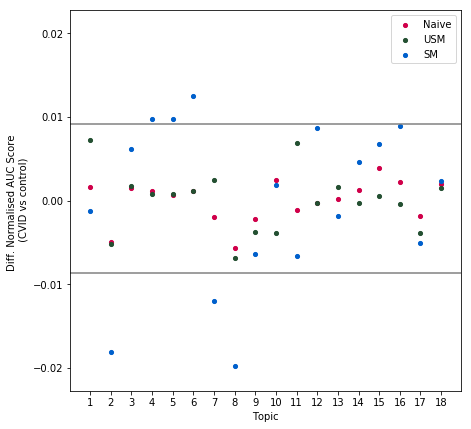

In [27]:
plt.figure(figsize=[7,7])
plt.scatter(list(diff_df.index), diff_df['Naive CVID vs CONTROL'], c='#D0004A', s=17, label='Naive')
plt.scatter(list(diff_df.index), diff_df['USM CVID vs CONTROL'], c='#245032', s=17, label='USM')
plt.scatter(list(diff_df.index), diff_df['SM CVID vs CONTROL'], c='#0060CC', s=17, label='SM')

plt.xticks([i+1 for i in range(len(diff_df.index))])


plt.axhline(y=np.percentile(all_3_diff, 5), c='grey')
plt.axhline(y=np.percentile(all_3_diff, 95), c='grey')

plt.ylim(top=-min(all_3_diff)+0.003)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(all_3_diff)-0.003)  # adjust the bottom leaving top unchanged

plt.xlabel('Topic')



plt.legend()


plt.ylabel('Diff. Normalised AUC Score \n (CVID vs control)')


plt.savefig('./figures/cisTopic_percentile_topics_cell_states.pdf',bbox_inches='tight')

So at the extremes of differences in topic enrichment between CVID and CONTROL we see topics 2,7,8 and 4,5,6

_________

In [32]:
cisTopic_colors = []
for i in range(topic_number):
    cisTopic_colors.append(list(diff_df.loc[i+1,:]))

In [33]:
cisTopic_colors = [item for sublist in cisTopic_colors for item in sublist]

In [34]:
cisTopic_sizes = []
for i in range(topic_number):
    cisTopic_sizes.append(neglog_pvals_Naive['Topic'+str(i+1)])
    cisTopic_sizes.append(neglog_pvals_USM['Topic'+str(i+1)])
    cisTopic_sizes.append(neglog_pvals_SM['Topic'+str(i+1)])


In [43]:
# bigger dots for easier visual assessment
cisTopic_sizes_15 = [elem*15 for elem in cisTopic_sizes]

In [37]:
dot_sequence_int_15 = [elem*15 for elem in [0.1, 2, 5, 10]]

In [39]:
max(cisTopic_colors)

0.012496660837816219

In [40]:
min(cisTopic_colors)

-0.01975810304866636

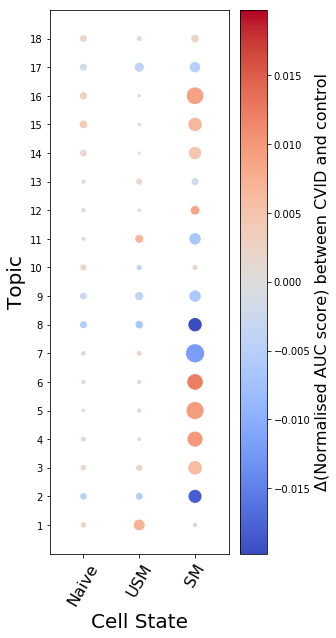

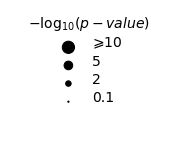

In [46]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig1 = plt.figure(figsize=[4,10])
ax1 = plt.subplot(111)

x = cisTopic_x # celltype+condition variable (6 total)
y = cisTopic_y # topics
#x = np.random.random()
#y = np.random.random()
c = cisTopic_colors  # color of points
s = cisTopic_sizes_15  # size of points

#plt.title('|\u0394''(Normalised AUC score)| between CVID and control',fontsize=16)

im1 = ax1.scatter(x, y, c=c, s=s, cmap='coolwarm', vmin=min(cisTopic_colors), vmax=-min(cisTopic_colors))

# Add a colorbar
cbar = plt.colorbar(im1, ax=ax1)
#cbar = plt.clim(min(cisTopic_colors), -min(cisTopic_colors))

cbar.set_label('\u0394''(Normalised AUC score) between CVID and control',fontsize=16)

# set the color limits - not necessary here, but good to know how.
im1.set_clim(min(cisTopic_colors), -min(cisTopic_colors))

plt.xlabel('Cell State',fontsize=20)
plt.ylabel('Topic',fontsize=20)

plt.xticks([1,2,3], ('Naive', 'USM', 'SM'))
plt.yticks([i+1 for i in range(18)],tuple([i+1 for i in range(18)]))

plt.tick_params(axis='x',labelsize=16, labelrotation=60)

plt.xlim(0.4, 3.6)
plt.ylim(0, 19)





fig2 = plt.figure(figsize=[3,2])
ax2 = plt.subplot()

x_dots = [1,1,1,1]
y_dots = [1,2,3,4]

im2 = ax2.scatter(x_dots, y_dots, c='black', s=dot_sequence_int_15, cmap='YlOrRd')

plt.text(1.1,1,'0.1',fontsize=14)
plt.text(1.1,2,'2',fontsize=14)
plt.text(1.1,3,'5',fontsize=14)
plt.text(1.1,4,r'$\geqslant 10$',fontsize=14)

plt.text(0.83, 5.1, r'$-\log_{10} (p-value)$', fontsize=14)

plt.axis('off')

plt.xlim(0.8, 1.5)
plt.ylim(0, 6)

#plt.show()



import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("./figures/cisTopic_dotplot_cell_state.pdf")
for fig in [fig1, fig2]: ## will open an empty extra figure :(
    pdf.savefig(fig, bbox_inches='tight')
pdf.close()